In [7]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adadelta", loss="binary_crossentropy")

# an encoder:
encoder = Model(input_img, encoded)
# a decoder:
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))


from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [13]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_test.shape, x_train.shape
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))



(10000, 784) (60000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s - loss: 0.6661 - val_loss: 0.6245
Epoch 2/50
60000/60000 [==============================] - 5s - loss: 0.3887 - val_loss: 0.1092
Epoch 3/50
60000/60000 [==============================] - 5s - loss: 0.0475 - val_loss: 0.0210
Epoch 4/50
60000/60000 [==============================] - 5s - loss: 0.0141 - val_loss: 0.0096
Epoch 5/50
60000/60000 [==============================] - 4s - loss: 0.0075 - val_loss: 0.0058
Epoch 6/50
60000/60000 [==============================] - 4s - loss: 0.0048 - val_loss: 0.0040
Epoch 7/50
60000/60000 [==============================] - 4s - loss: 0.0034 - val_loss: 0.0030
Epoch 8/50
60000/60000 [==============================] - 4s - loss: 0.0026 - val_loss: 0.0023
Epoch 9/50
60000/60000 [==============================] - 5s - loss: 0.0021 - val_loss: 0.0019
Epoch 10/50
60000/60000 [==============================] - 5s - loss:

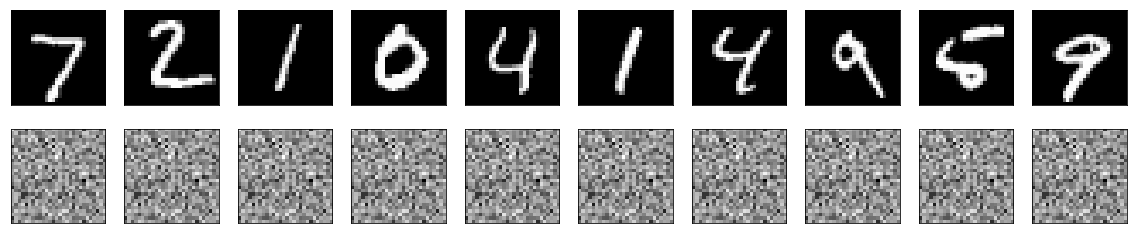

In [15]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
from keras import regularizers
encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
